# **PROYEK PENAMBANGAN DATA**

## **Analisis Penerapan Model Klasifikasi Decision Tree dan K-Nearest Neighbors untuk Mengetahui Hasil Kepuasan Penumpang Maskapai**

---

Nama Anggota kelompok 6:
- Nurus Shobah Hidayati (23031554163)
- Ananda Sakinah (23031554060)
- Hesti Rara Anjani (23031554023)

Sumber Dataset : [Airline Passenger Satisfaction](https://mavenanalytics.io/challenges/maven-airlines-challenge/d2985444-e11e-48dd-b7c9-4aa1f02aaeaa)

## **Exploratory Data Analysis (EDA)**

### a. Load Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')

### b. Gambaran Dataset

In [ ]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### c. Jumlah row dan Coloum

In [ ]:
df.shape

(129880, 24)

### d. Informasi Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### e. Checking Missing Value

                         Total Missing  Percentage (%)
Arrival Delay                      358        0.307433
Leg Room Service                     1        0.000859
Gate Location                        1        0.000859
Seat Comfort                         1        0.000859
Online Boarding                      1        0.000859
Check-in Service                     1        0.000859
Ease of Online Booking               1        0.000859
On-board Service                     1        0.000859
In-flight Wifi Service               1        0.000859
Cleanliness                          1        0.000859
Food and Drink                       1        0.000859
In-flight Service                    1        0.000859
Baggage Handling                     1        0.000859
In-flight Entertainment              1        0.000859
Satisfaction                         1        0.000859


<ipython-input-2-7fc5f7848ea2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


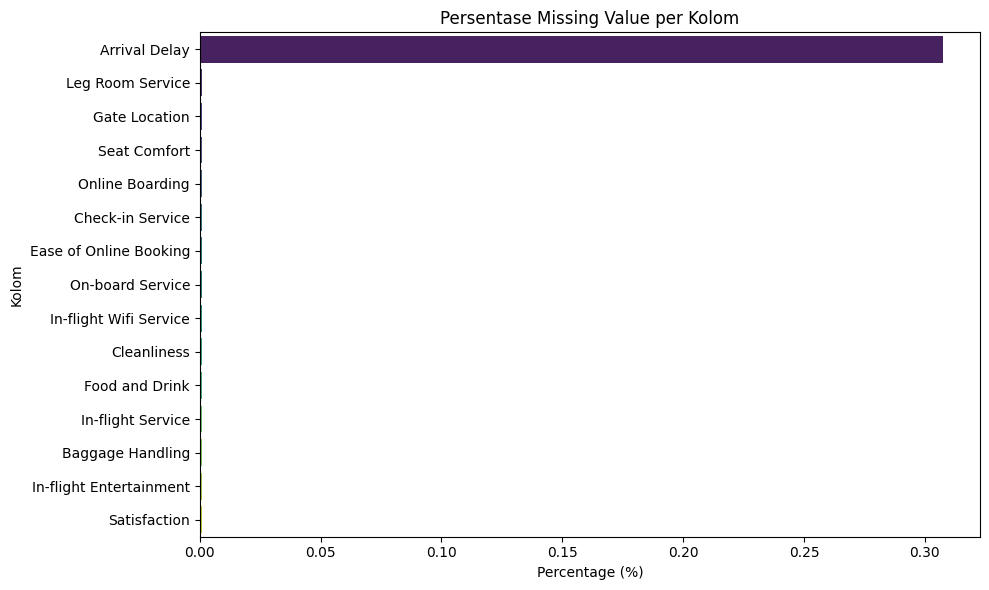

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung missing value dan persentasenya
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

# Buat dataframe ringkasan missing value
missing_df = pd.DataFrame({
    'Total Missing': missing_data,
    'Percentage (%)': missing_percentage
})

# Tampilkan yang memiliki missing value
missing_df = missing_df[missing_df['Total Missing'] > 0]
print(missing_df)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(
    y=missing_df.index,
    x=missing_df['Percentage (%)'],
    palette='viridis'
)
plt.title('Persentase Missing Value per Kolom')
plt.xlabel('Percentage (%)')
plt.ylabel('Kolom')
plt.tight_layout()
plt.show()


In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({'Total Missing': missing_data, 'Percentage (%)': missing_percentage})
print(missing_df[missing_df['Total Missing'] >= 0])

                                        Total Missing  Percentage (%)
Arrival Delay                                     393        0.302587
ID                                                  0        0.000000
Age                                                 0        0.000000
Gender                                              0        0.000000
Type of Travel                                      0        0.000000
Class                                               0        0.000000
Flight Distance                                     0        0.000000
Customer Type                                       0        0.000000
Departure Delay                                     0        0.000000
Departure and Arrival Time Convenience              0        0.000000
Ease of Online Booking                              0        0.000000
Check-in Service                                    0        0.000000
Online Boarding                                     0        0.000000
Gate Location       

### f. Distribusi Target

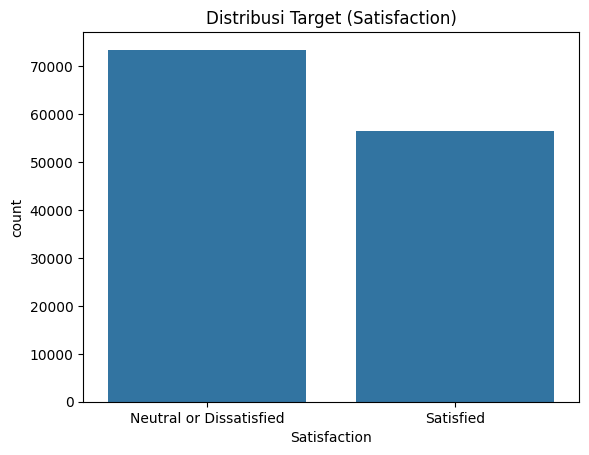

,count
Satisfaction,
Neutral or Dissatisfied,73452
Satisfied,56428


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Satisfaction', data=df)
plt.title('Distribusi Target (Satisfaction)')
plt.show()

df.value_counts("Satisfaction")

### g. Distribusi Fitur

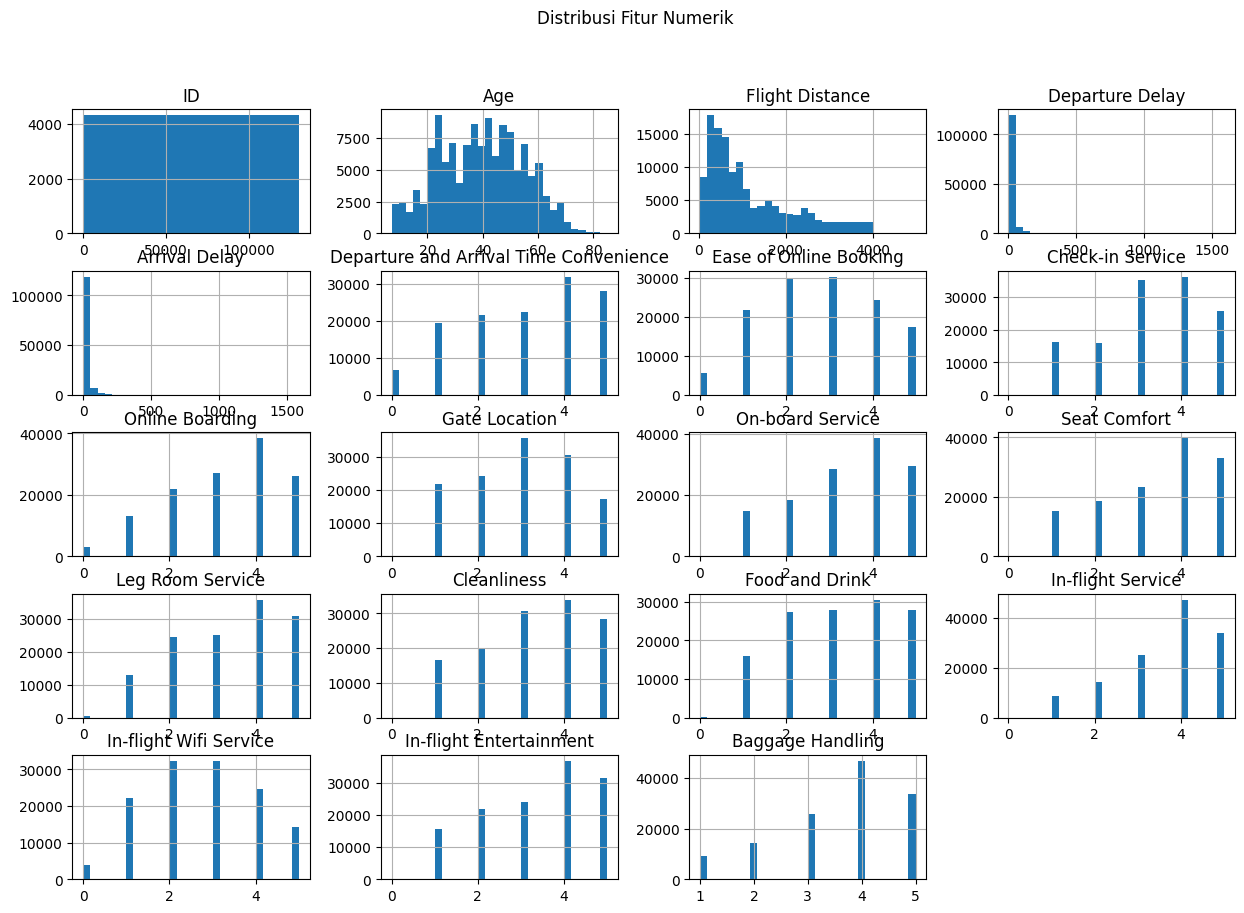

In [ ]:
# fitur numerik
df.select_dtypes(include='number').hist(bins=30, figsize=(15,10))
plt.suptitle('Distribusi Fitur Numerik')
plt.show()


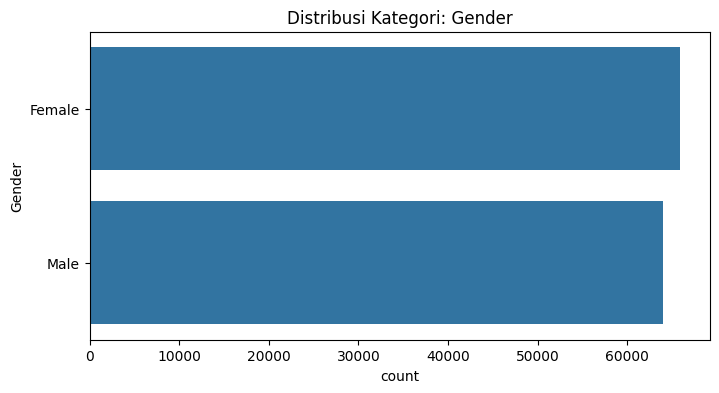

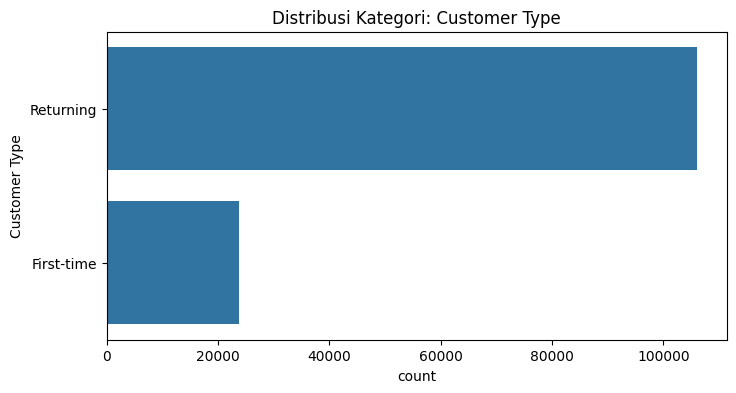

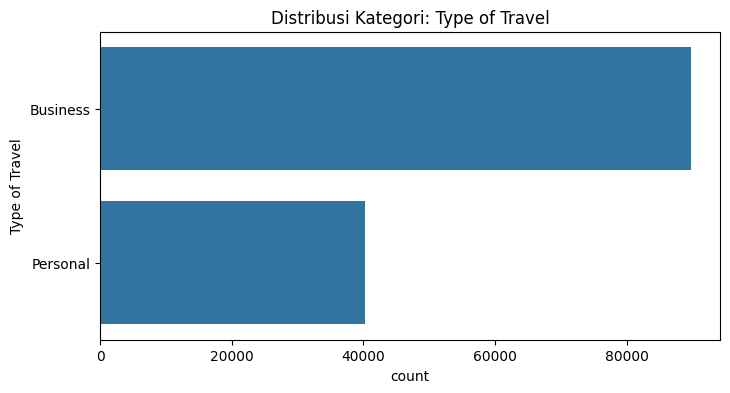

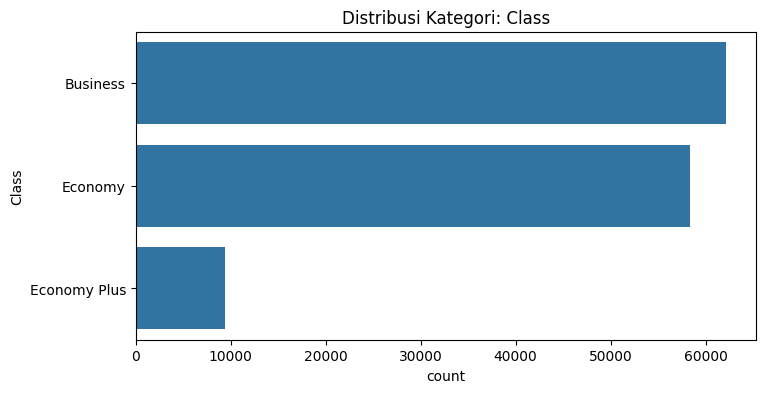

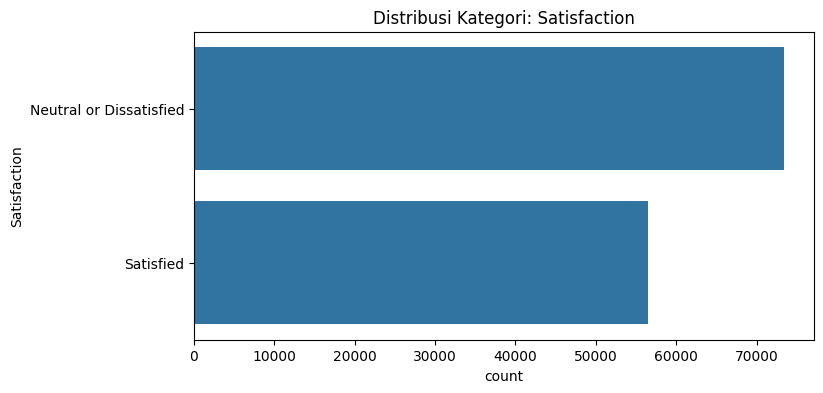

In [ ]:
# fitur katagorikal

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi Kategori: {col}')
    plt.show()


### h. Checking Outliers

                                   Feature  Outlier Count
3                          Departure Delay          18098
4                            Arrival Delay          17492
7                         Check-in Service          16109
2                          Flight Distance           2855
0                                       ID              0
1                                      Age              0
5   Departure and Arrival Time Convenience              0
6                   Ease of Online Booking              0
8                          Online Boarding              0
9                            Gate Location              0
10                        On-board Service              0
11                            Seat Comfort              0
12                        Leg Room Service              0
13                             Cleanliness              0
14                          Food and Drink              0
15                       In-flight Service              0
16            

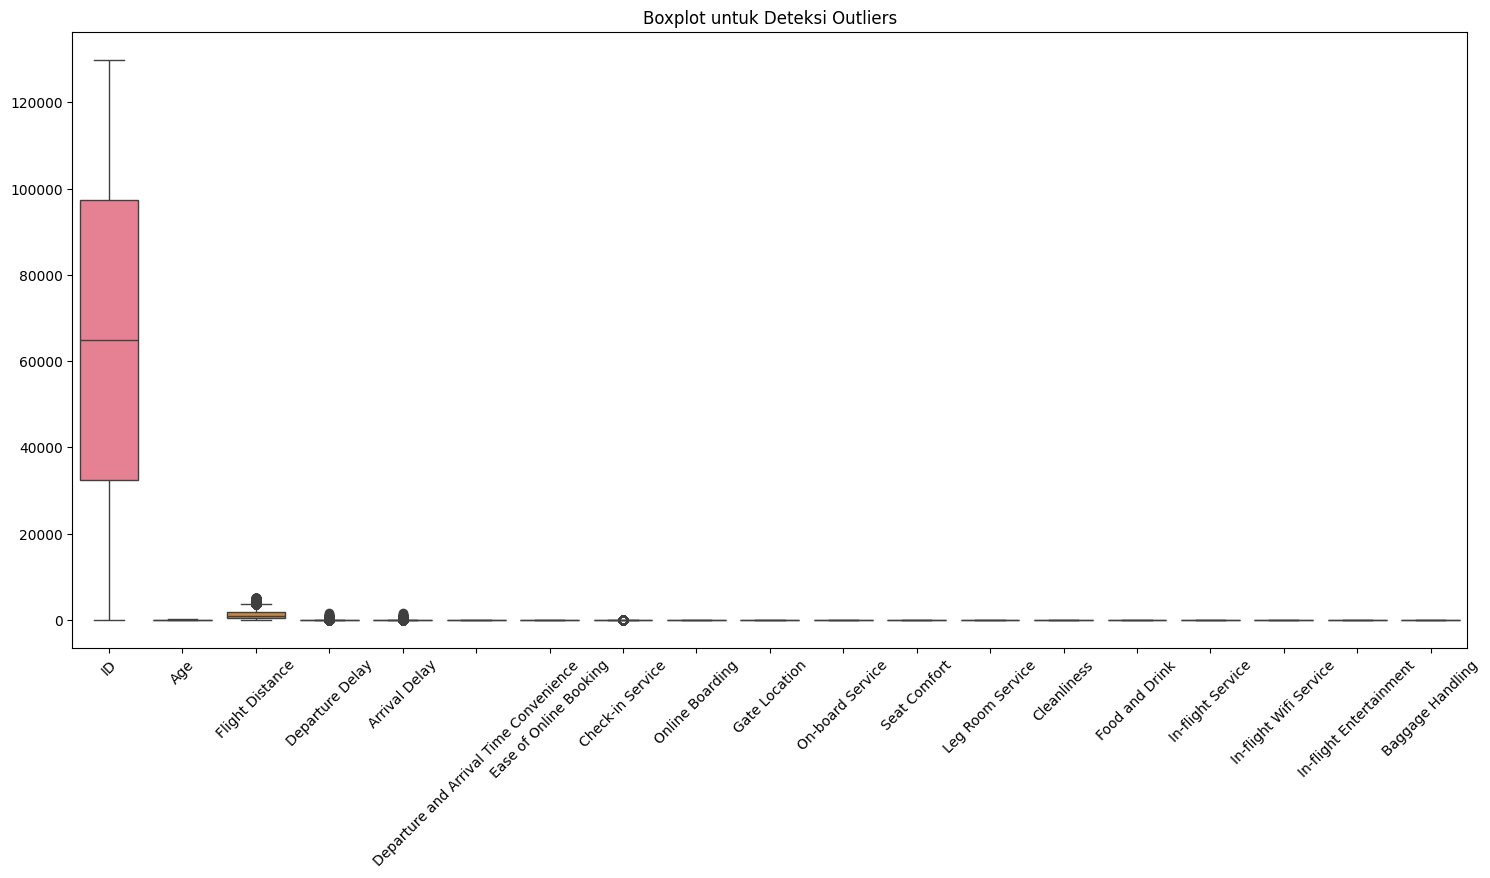

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_counts = {col: len(detect_outliers_iqr(df, col)) for col in numerical_columns}

outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
outlier_counts_df = outlier_counts_df.sort_values(by='Outlier Count', ascending=False)
print(outlier_counts_df)

plt.figure(figsize=(18, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot untuk Deteksi Outliers')
plt.show()

### i. Checking Skewness

- -0.5 hingga +0.5 = Hampir simetris / normal -> tidak perlu transformasi
- -1.0 hingga -0.5 atau 0.5 hingga 1.0 = Moderat miring kiri/kanan -> pertimbangkan transformasi
- < -1.0 atau > +1.0 = Sangat miring (highly skewed) -> wajib transformasi

Departure Delay                           6.821980
Arrival Delay                             6.670125
Flight Distance                           1.108142
In-flight Wifi Service                    0.040465
ID                                        0.000000
Age                                      -0.003606
Ease of Online Booking                   -0.018779
Gate Location                            -0.058265
Food and Drink                           -0.155063
Cleanliness                              -0.300926
Departure and Arrival Time Convenience   -0.332469
Leg Room Service                         -0.348414
In-flight Entertainment                  -0.366385
Check-in Service                         -0.366569
On-board Service                         -0.421320
Online Boarding                          -0.456911
Seat Comfort                             -0.485818
Baggage Handling                         -0.677400
In-flight Service                        -0.691580
dtype: float64


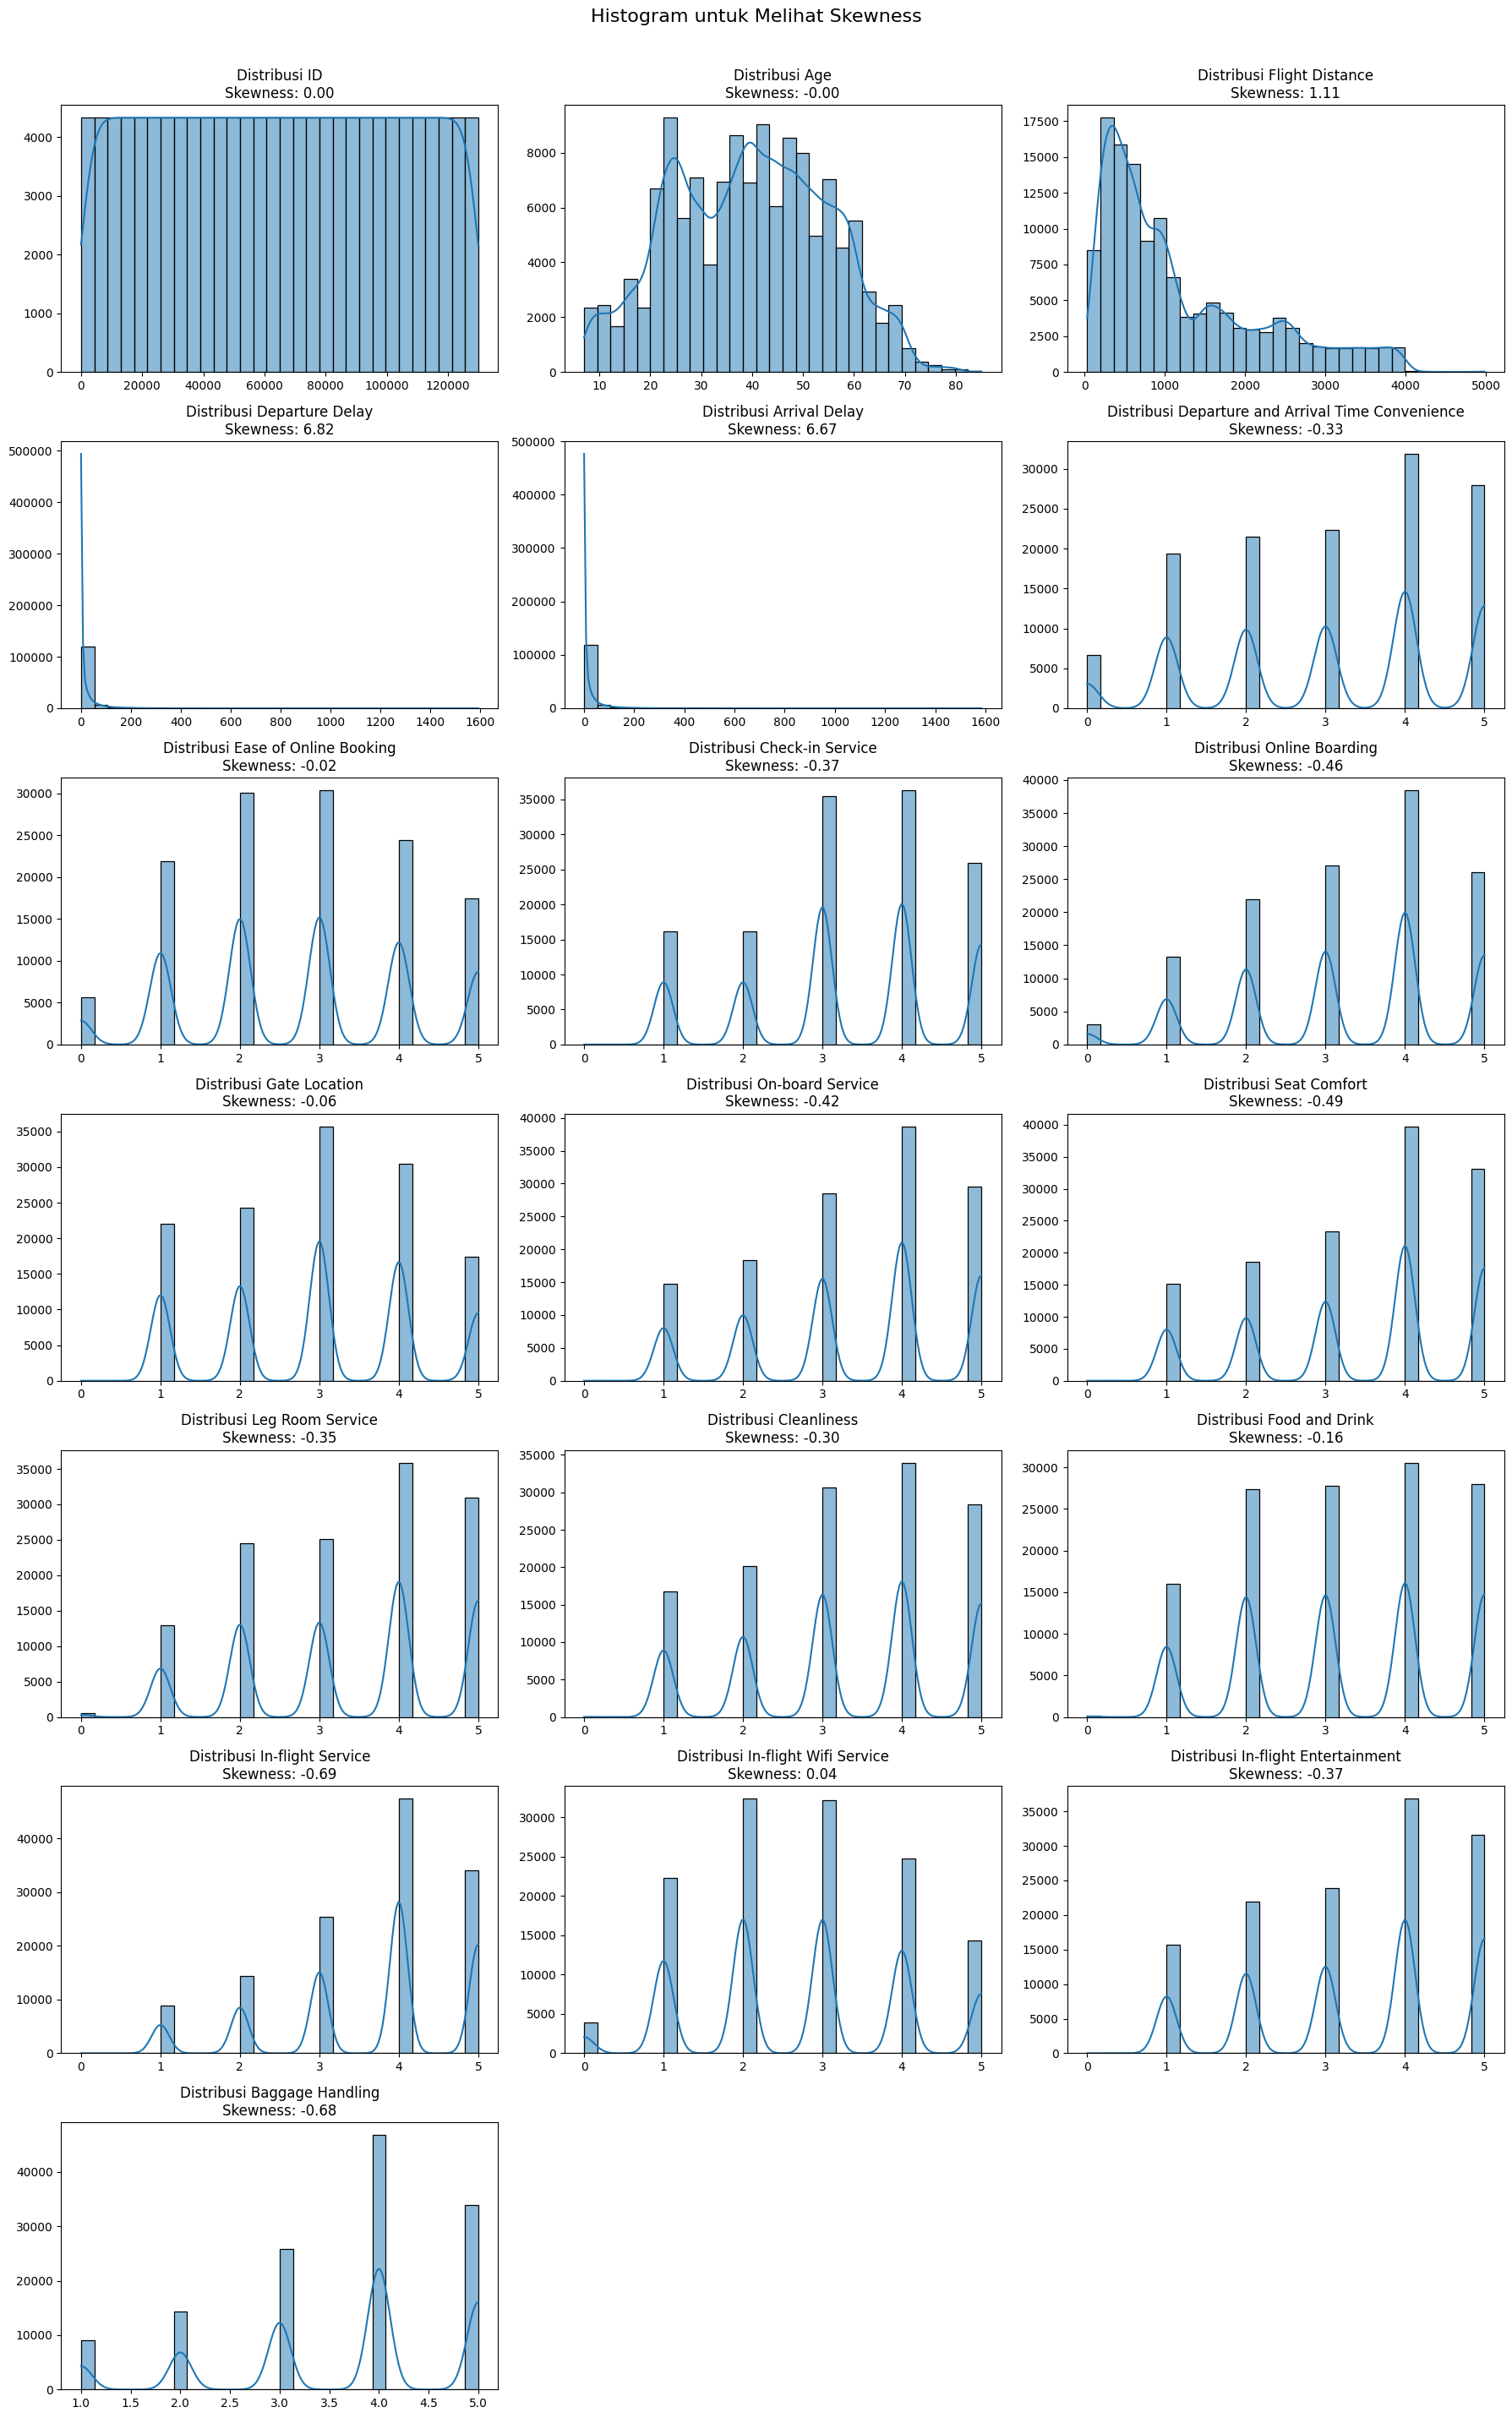

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

skewness_values = df[numerical_columns].skew().sort_values(ascending=False)
print(skewness_values)

num_features = len(numerical_columns)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Histogram untuk Melihat Skewness', fontsize=16, y=1.02)
plt.show()

## **Pre-processing**

In [ ]:
df2 = df.copy()

### a. Drop Coloum

In [ ]:
columns_to_drop = ['ID']
df2.drop(columns=columns_to_drop, axis=1, inplace=True)

### b. Handling Missing Values

            Kondisi  Total Missing  Persentase (%)
0  Sebelum Imputasi            393        0.302587
1  Sesudah Imputasi              0        0.000000


<ipython-input-13-254463096>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


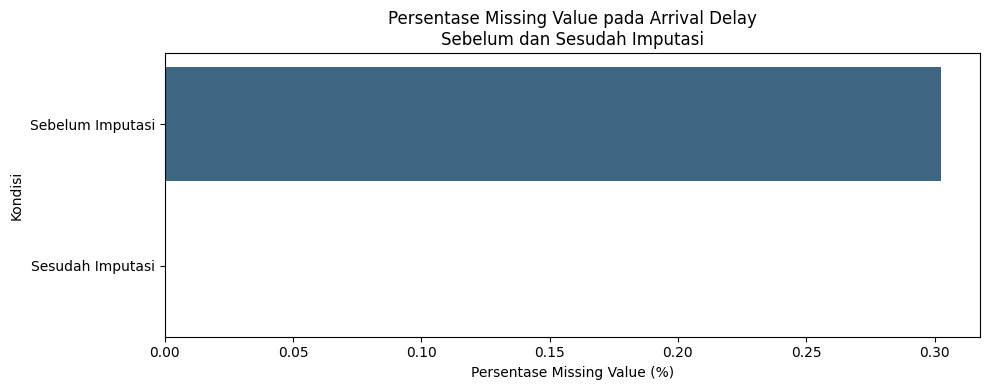

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

median = df2['Arrival Delay'].median()
df2['Arrival Delay'] = df2['Arrival Delay'].fillna(median)

total_missing_before = df['Arrival Delay'].isnull().sum()
percentage_missing_before = (total_missing_before / len(df)) * 100

total_missing_after = df2['Arrival Delay'].isnull().sum()
percentage_missing_after = (total_missing_after / len(df2)) * 100

missing_comparison = pd.DataFrame({
    'Kondisi': ['Sebelum Imputasi', 'Sesudah Imputasi'],
    'Total Missing': [total_missing_before, total_missing_after],
    'Persentase (%)': [percentage_missing_before, percentage_missing_after]
})

print(missing_comparison)

plt.figure(figsize=(10, 4))
sns.barplot(
    y='Kondisi',
    x='Persentase (%)',
    data=missing_comparison,
    palette='viridis'
)
plt.title('Persentase Missing Value pada Arrival Delay\nSebelum dan Sesudah Imputasi')
plt.xlabel('Persentase Missing Value (%)')
plt.ylabel('Kondisi')
plt.tight_layout()
plt.show()


### c. Handling Outliers

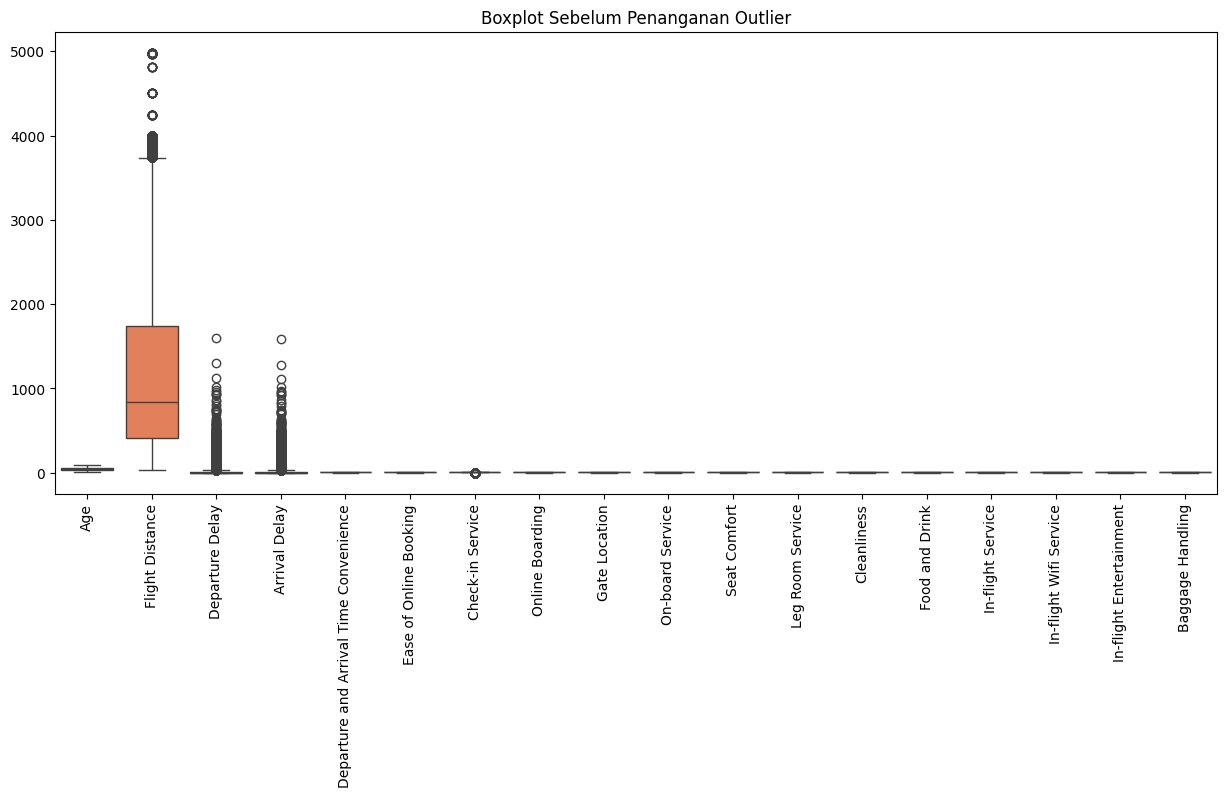

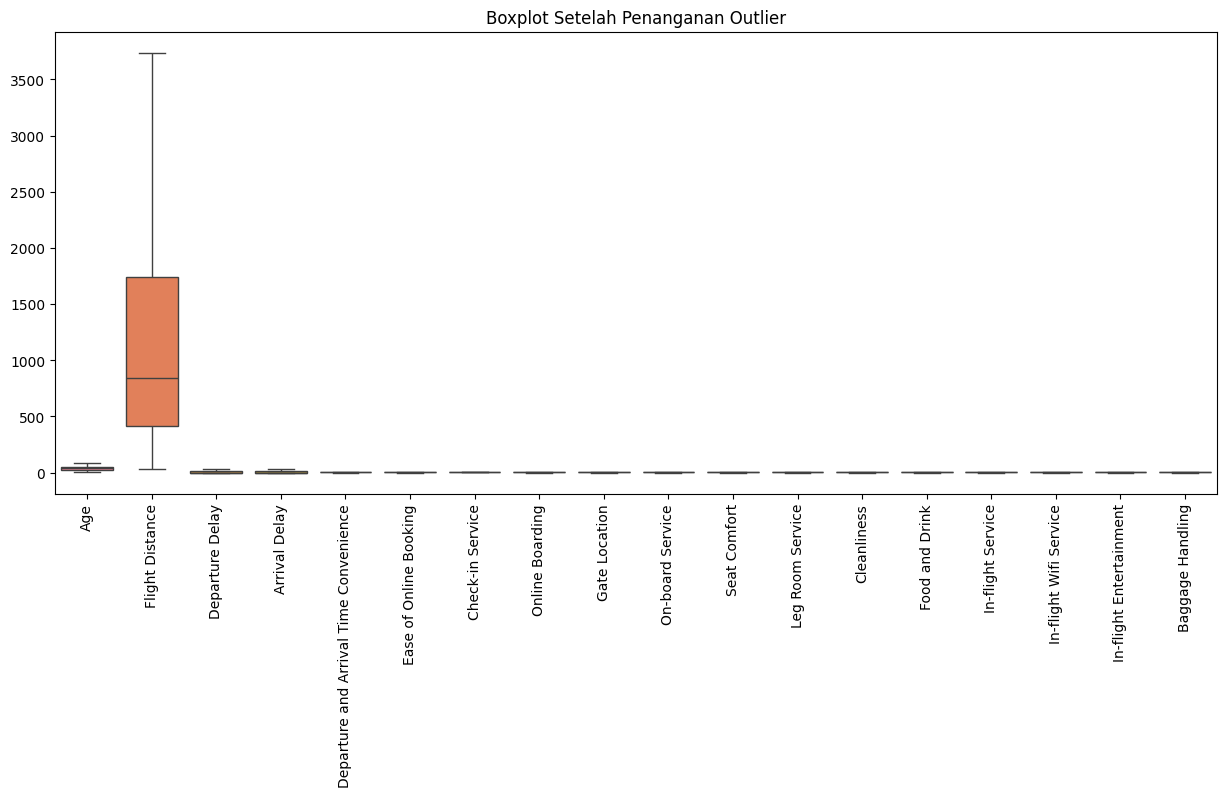

                                   Feature  Outliers Sebelum  Outliers Setelah
0                          Departure Delay             18098                 0
1                            Arrival Delay             17492                 0
2                         Check-in Service             16109                 0
3                          Flight Distance              2855                 0
4                                      Age                 0                 0
5   Departure and Arrival Time Convenience                 0                 0
6                   Ease of Online Booking                 0                 0
7                          Online Boarding                 0                 0
8                            Gate Location                 0                 0
9                         On-board Service                 0                 0
10                            Seat Comfort                 0                 0
11                        Leg Room Service          

In [ ]:
cols = df2.select_dtypes(include=['int64', 'float64']).columns

def count_outliers(data, columns):
    outlier_count = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        outlier_count[col] = outliers
    return outlier_count

outliers_before = count_outliers(df2, cols)

plt.figure(figsize=(15, 6))
sns.boxplot(data=df2[cols])
plt.title('Boxplot Sebelum Penanganan Outlier')
plt.xticks(rotation=90)
plt.show()

def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower_bound, upper_bound)

handle_outliers_iqr(df2, cols)
outliers_after = count_outliers(df2, cols)

plt.figure(figsize=(15, 6))
sns.boxplot(data=df2[cols])
plt.title('Boxplot Setelah Penanganan Outlier')
plt.xticks(rotation=90)
plt.show()

outlier_df = pd.DataFrame({
    'Feature': list(outliers_before.keys()),
    'Outliers Sebelum': list(outliers_before.values()),
    'Outliers Setelah': list(outliers_after.values())
})

outlier_df = outlier_df.sort_values(by='Outliers Sebelum', ascending=False).reset_index(drop=True)
print(outlier_df)

### d. Handling Skewness

,Skewness Sebelum,Skewness Sesudah
Departure Delay,6.82,0.66
Arrival Delay,6.67,0.63
Flight Distance,1.11,-0.21


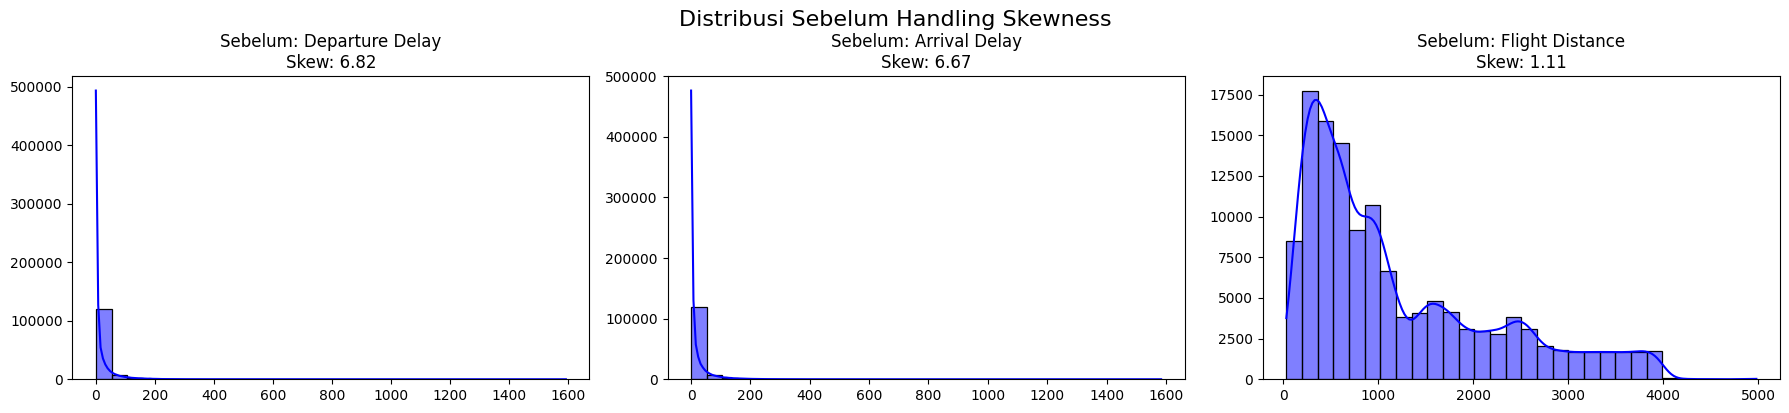

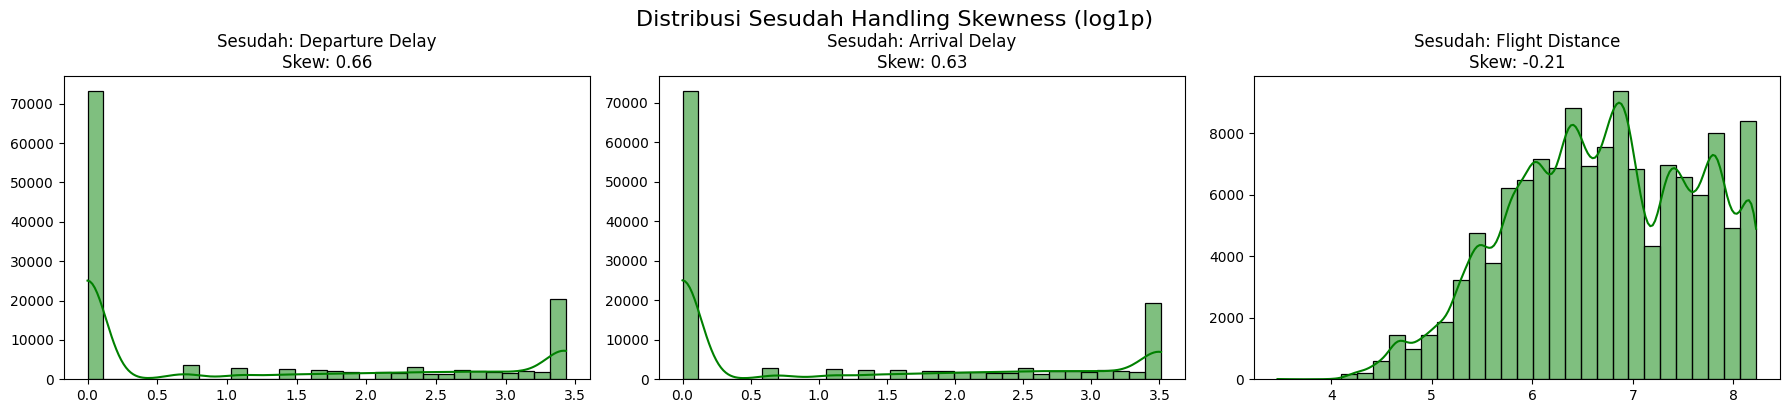

In [ ]:
import numpy as np

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

skewness_values = df[numerical_columns].skew().sort_values(ascending=False)
features_to_transform = skewness_values[skewness_values > 0.5].index.tolist()

df_before_skew = df[features_to_transform].copy()

for col in features_to_transform:
    if (df2[col] < 0).any():
        continue
    df2[col] = np.log1p(df2[col])

def summary_stats_comparison(before_df, after_df, columns):
    summary = pd.DataFrame(index=columns)
    summary['Skewness Sebelum'] = before_df[columns].skew()
    summary['Skewness Sesudah'] = after_df[columns].skew()
    return summary.round(2)

stat_table = summary_stats_comparison(df_before_skew, df2, features_to_transform)
display(stat_table)

num_features = len(features_to_transform)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)

plt.figure(figsize=(18, rows * 4))
for i, col in enumerate(features_to_transform, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_before_skew[col], kde=True, bins=30, color='blue')
    plt.title(f'Sebelum: {col}\nSkew: {df_before_skew[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Distribusi Sebelum Handling Skewness', fontsize=16, y=1.02)
plt.show()

plt.figure(figsize=(18, rows * 4))
for i, col in enumerate(features_to_transform, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df2[col], kde=True, bins=30, color='green')
    plt.title(f'Sesudah: {col}\nSkew: {df2[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Distribusi Sesudah Handling Skewness (log1p)', fontsize=16, y=1.02)
plt.show()

### e. Scaling
Menggunakan teknik scaling StandardScaler, yakni mengubah data jadi distribusi dengan rata-rata 0 dan standar deviasi 1.

,Mean Sebelum,Std Sebelum,Min Sebelum,Max Sebelum,Mean Sesudah,Std Sesudah,Min Sesudah,Max Sesudah
Age,39.43,15.12,7.00,85.00,-0.0,1.0,-2.14,3.01
Flight Distance,6.71,0.91,3.47,8.23,0.0,1.0,-3.54,1.66
Departure Delay,1.12,1.41,0.00,3.43,0.0,1.0,-0.80,1.64
Arrival Delay,1.16,1.44,0.00,3.51,0.0,1.0,-0.81,1.64
Departure and Arrival Time Convenience,3.06,1.53,0.00,5.00,0.0,1.0,-2.00,1.27
Ease of Online Booking,2.76,1.40,0.00,5.00,-0.0,1.0,-1.97,1.60
Check-in Service,3.37,1.16,1.50,5.00,0.0,1.0,-1.61,1.41
Online Boarding,3.25,1.35,0.00,5.00,0.0,1.0,-2.41,1.29
Gate Location,2.98,1.28,0.00,5.00,-0.0,1.0,-2.33,1.58
On-board Service,3.38,1.29,0.00,5.00,0.0,1.0,-2.63,1.26


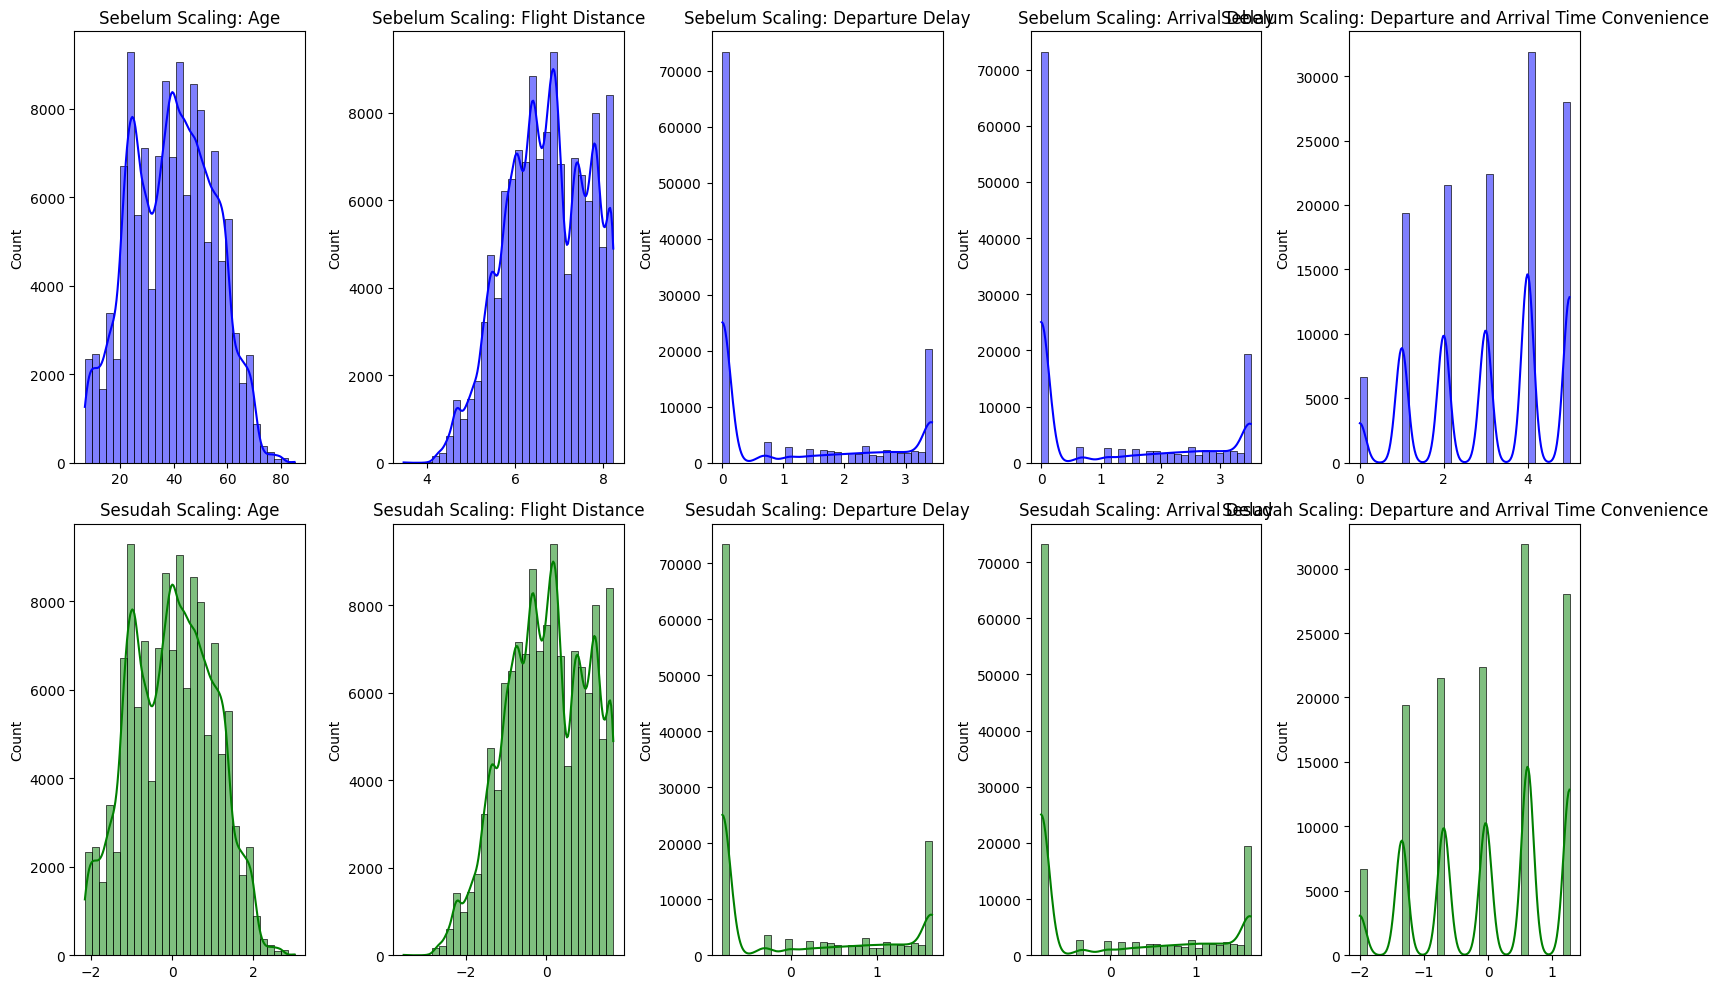

In [ ]:
from sklearn.preprocessing import StandardScaler

df_before_scaling = df2.copy()

numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

def summary_stats_comparison(before_df, after_df, columns):
    summary = pd.DataFrame(index=columns)
    summary['Mean Sebelum'] = before_df[columns].mean()
    summary['Std Sebelum'] = before_df[columns].std()
    summary['Min Sebelum'] = before_df[columns].min()
    summary['Max Sebelum'] = before_df[columns].max()

    summary['Mean Sesudah'] = after_df[columns].mean()
    summary['Std Sesudah'] = after_df[columns].std()
    summary['Min Sesudah'] = after_df[columns].min()
    summary['Max Sesudah'] = after_df[columns].max()

    return summary.round(2)

stat_table = summary_stats_comparison(df_before_scaling, df2, numerical_cols)
display(stat_table)

def plot_before_after_scaling(original_df, scaled_df, columns, num_cols=5):
    plt.figure(figsize=(16, 10))

    for i, col in enumerate(columns[:num_cols]):
        plt.subplot(2, num_cols, i + 1)
        sns.histplot(original_df[col], bins=30, kde=True, color='blue')
        plt.title(f'Sebelum Scaling: {col}')
        plt.xlabel('')

        plt.subplot(2, num_cols, i + 1 + num_cols)
        sns.histplot(scaled_df[col], bins=30, kde=True, color='green')
        plt.title(f'Sesudah Scaling: {col}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

plot_before_after_scaling(df_before_scaling, df2, numerical_cols, num_cols=5)

### b. Encoding

- Label Encoding untuk fitur berurutan, dalam kasus ini di gunakan untuk fitur yang memiliki 2 nilai yakni; Gender, Customer Type, Type of Travel, dan Satisfaction.
- One-Hot Encoding untuk fitur yang tidak dapat diurutkan dan dalam kasus ini akan dipakai untuk fitur yang memiliki lebih dari 2 nilai, yakni Class.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols =  ['Gender', 'Customer Type', 'Type of Travel', 'Satisfaction']
onehot_cols = ['Class']

all_categorical_cols = label_cols + onehot_cols
le = LabelEncoder()

for col in all_categorical_cols:
    df2[col] = le.fit_transform(df2[col])

print("Dataframe setelah encoding:")
(df2.head())

Dataframe setelah encoding:


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,0.566960,0,0,0,0.006729,-0.017445,0.441434,-0.037727,0.173445,...,-0.297587,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,0
1,0,-0.292868,1,0,0,0.006729,1.542887,1.638783,-0.692719,-0.539957,...,1.256300,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1
2,1,0.103976,1,0,0,0.048506,-0.797611,-0.806026,0.617265,0.886847,...,-0.297587,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1
3,1,0.699242,1,0,0,0.926720,-0.797611,-0.806026,-0.692719,-0.539957,...,1.256300,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1
4,0,0.633101,1,0,0,1.582442,-0.797611,-0.323443,-0.037727,0.173445,...,-0.297587,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1


### g. Split Dataset

Membagi dataset menjadi 80% untuk trai dan 20% untuk test

In [ ]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns='Satisfaction')
y = df2['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")

Jumlah data train: 103904
Jumlah data test: 25976


### f. Feature Selection




,Satisfaction
Online Boarding,0.500812
In-flight Entertainment,0.397994
Seat Comfort,0.348017
On-board Service,0.320822
Leg Room Service,0.313027
Cleanliness,0.306210
In-flight Wifi Service,0.283006
Flight Distance,0.249761
Baggage Handling,0.249078
In-flight Service,0.245697


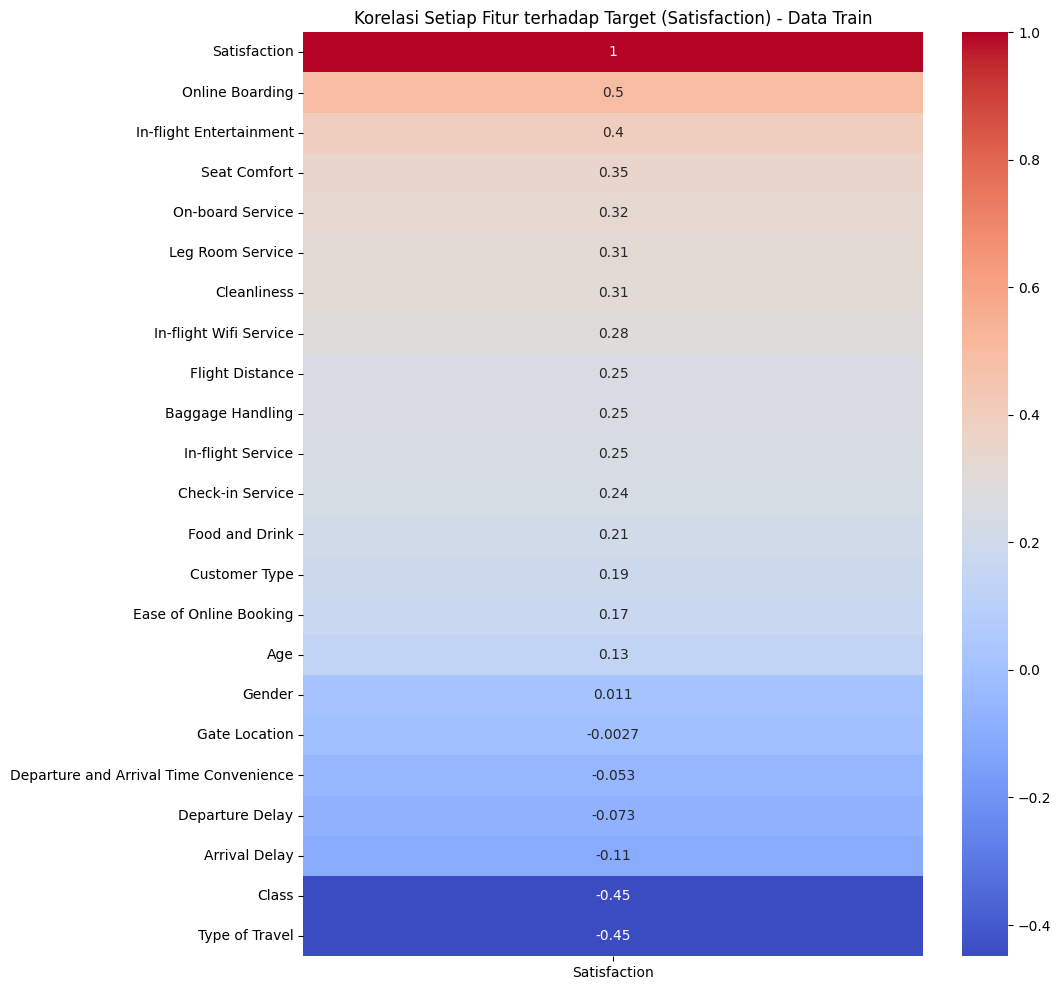

In [ ]:
train_data = X_train.copy()
train_data['Satisfaction'] = y_train

correlation = train_data.corr(numeric_only=True)['Satisfaction'].drop('Satisfaction').sort_values(ascending=False)
display(correlation)

plt.figure(figsize=(10, 12))
sns.heatmap(train_data.corr(numeric_only=True)[['Satisfaction']].sort_values(by='Satisfaction', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Korelasi Setiap Fitur terhadap Target (Satisfaction) - Data Train')
plt.show()

In [ ]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

In [ ]:
drop_features = ['Gate Location','Departure and Arrival Time Convenience','Departure Delay','Arrival Delay','Class','Type of Travel']

X_train_drop = X_train2.drop(columns=drop_features, axis=1)
X_test_drop = X_test2.drop(columns=drop_features, axis=1)

print("Train sebelum drop:", X_train.shape)
print("Train sesudah drop:", X_train_drop.shape)
print("Test sebelum drop:", X_test.shape)
print("Test sesudah drop :", X_test_drop.shape)

Train sebelum drop: (103904, 22)
Train sesudah drop: (103904, 16)
Test sebelum drop: (25976, 22)
Test sesudah drop : (25976, 16)


### h. SMOTE

Melakuakn SMOTE hanya pada data train

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train2, y_train)

X_train_drop_sm, y_train_drop_sm = sm.fit_resample(X_train_drop, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Setelah SMOTE:", y_train_sm.value_counts())

Sebelum SMOTE: Satisfaction
0    58762
1    45142
Name: count, dtype: int64
Setelah SMOTE: Satisfaction
1    58762
0    58762
Name: count, dtype: int64


## **Implementasi Algoritma**

### a. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train_sm, y_train_sm)

dt_drop = DecisionTreeClassifier(random_state=42)
dt_drop.fit(X_train_drop_sm, y_train_drop_sm)

DecisionTreeClassifier(random_state=42)

### b. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_full = KNeighborsClassifier(n_neighbors=5)
knn_full.fit(X_train_sm, y_train_sm)

knn_drop = KNeighborsClassifier(n_neighbors=5)
knn_drop.fit(X_train_drop_sm, y_train_drop_sm)

KNeighborsClassifier()

## **Evaluasi Matriks**

### a. Akurasi, Precision, Recall, F1-Score, dan Support

In [ ]:
from sklearn.metrics import classification_report

y_pred_dt_full = dt_full.predict(X_test2)
y_pred_knn_full = knn_full.predict(X_test2)

y_pred_dt_drop = dt_drop.predict(X_test_drop)
y_pred_knn_drop = knn_drop.predict(X_test_drop)

evaluation_results = {}

def store_metrics(name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    evaluation_results[name] = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support'],
    }

store_metrics("Decision Tree (All Features)", y_test, y_pred_dt_full)
store_metrics("KNN (All Features)", y_test, y_pred_knn_full)
store_metrics("Decision Tree (Dropped Features)", y_test, y_pred_dt_drop)
store_metrics("KNN (Dropped Features)", y_test, y_pred_knn_drop)

import pandas as pd

eval_df = pd.DataFrame(evaluation_results).T
(eval_df)

,accuracy,precision,recall,f1-score,support
Decision Tree (All Features),0.946451,0.946542,0.946451,0.946480,25976.0
KNN (All Features),0.927087,0.927037,0.927087,0.927012,25976.0
Decision Tree (Dropped Features),0.918348,0.918417,0.918348,0.918376,25976.0
KNN (Dropped Features),0.917000,0.916931,0.917000,0.916940,25976.0


### b. Confusion Matrix

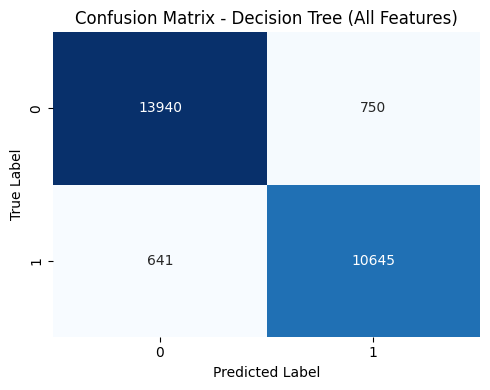

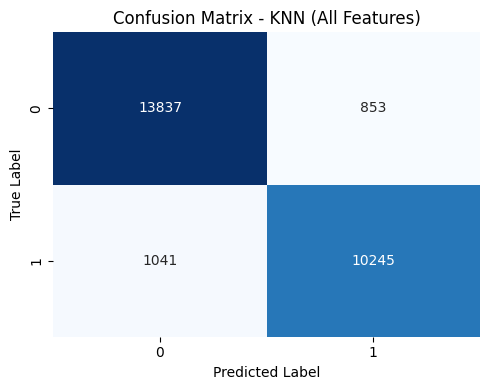

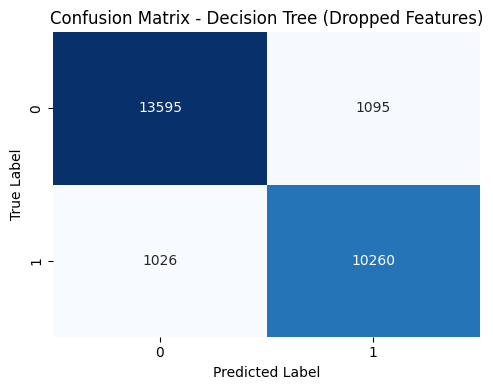

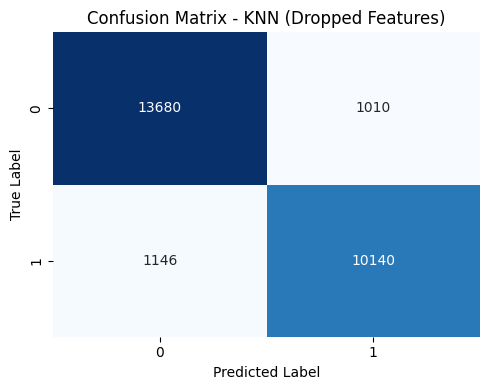

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt_full, "Decision Tree (All Features)")
plot_confusion_matrix(y_test, y_pred_knn_full, "KNN (All Features)")
plot_confusion_matrix(y_test, y_pred_dt_drop, "Decision Tree (Dropped Features)")
plot_confusion_matrix(y_test, y_pred_knn_drop, "KNN (Dropped Features)")


### c. Perbandingan Akurasi, Precision, Recall, dan F1-Score

<Figure size 1200x600 with 0 Axes>

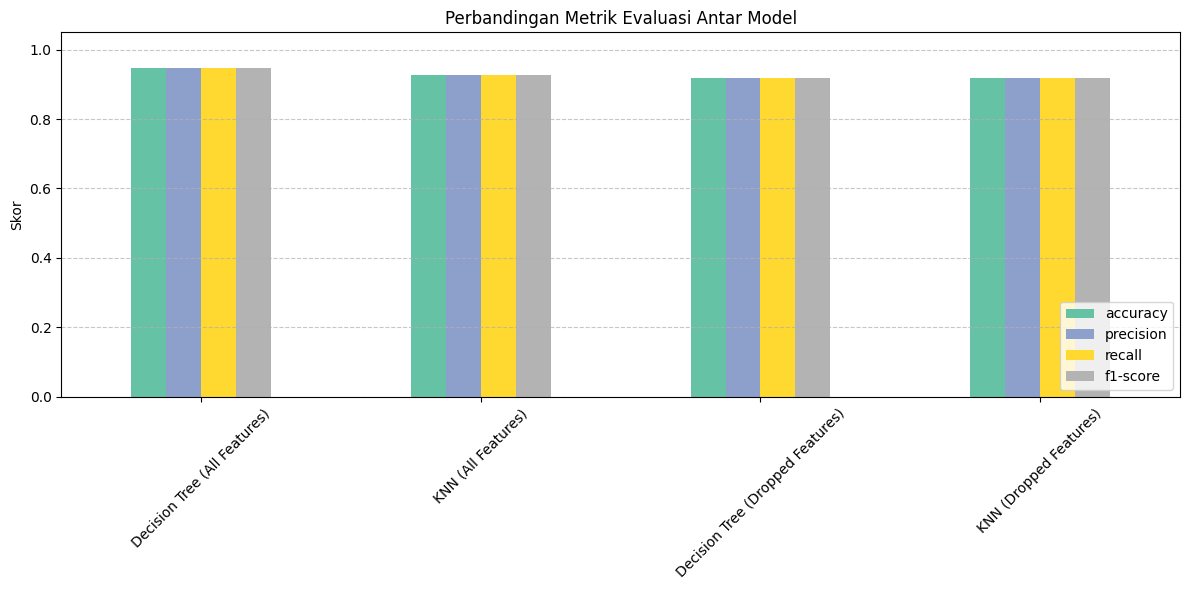

In [ ]:
eval_plot_df = eval_df.drop(columns='support')

plt.figure(figsize=(12, 6))
eval_plot_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Perbandingan Metrik Evaluasi Antar Model")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()